In [2]:
import yfinance as yf
import pandas as pd
#import numpy and pandas
import numpy as np

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

item={}
tickerStrings = ["SPY","AAPL","^TNX","^FVX","SPYG","SPYV","HYG","LQD","EUR=X",'CHF=X',"IVOL","QQQ","IWM","TQQQ","SQQQ"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
df1 = pd.concat(df_list)

# save to csv
df1.to_csv('ticker.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [23]:
# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot( "Ticker", column)

In [10]:
silver=pd.pivot(df1, values="Close",  columns="ticker") 

silver.reset_index()

ticker,Date,AAPL,CHF=X,EUR=X,HYG,IVOL,IWM,LQD,QQQ,SPY,SPYG,SPYV,SQQQ,TQQQ,^FVX,^TNX
0,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.880,4.060
1,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.870,4.030
2,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.860,3.990
3,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.890,4.020
4,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.910,4.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,2022-02-11,168.639999,0.92565,0.87600,82.660004,25.980000,201.380005,124.839996,347.059998,440.459991,63.869999,41.150002,41.619999,53.279999,1.868,1.955
15270,2022-02-14,168.880005,0.92472,0.87989,82.519997,26.030001,200.679993,123.730003,347.489990,439.019989,63.880001,40.889999,41.520000,53.430000,1.918,1.996
15271,2022-02-15,172.789993,0.92451,0.88446,82.660004,25.980000,206.059998,123.110001,356.130005,446.100006,65.169998,41.330002,38.450001,57.299999,1.935,2.045
15272,2022-02-16,172.550003,0.92544,0.88053,83.120003,26.090000,206.490005,123.290001,356.040009,446.600006,65.230003,41.419998,38.480000,57.290001,1.920,2.047


In [5]:


# do the pivot - i skipped this for now
close_px = pivot_tickers_to_columns(df1, "Close")
# peek at the result
close_px[:5]

KeyError: "None of [Index(['Ticker', 'Close'], dtype='object', name='Date')] are in the [index]"

In [11]:
# calculate daily percentage change
daily_pc = silver / silver.shift(1) - 1
daily_pc[5:]

ticker,AAPL,CHF=X,EUR=X,HYG,IVOL,IWM,LQD,QQQ,SPY,SPYG,SPYV,SQQQ,TQQQ,^FVX,^TNX
Date,,,,,,,,,,,,,,,
1962-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005115,0.004963
1962-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002545,0.004938
1962-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.002457
1962-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002538,0.000000
1962-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002532,0.004902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,-0.020218,0.001547,0.000525,-0.003496,0.019223,-0.010126,0.007424,-0.031722,-0.019719,-0.028741,-0.010342,0.094399,-0.094186,-0.039095,-0.037420
2022-02-14,0.001423,-0.001005,0.004441,-0.001694,0.001925,-0.003476,-0.008891,0.001239,-0.003269,0.000157,-0.006318,-0.002403,0.002815,0.026767,0.020972
2022-02-15,0.023152,-0.000227,0.005194,0.001697,-0.001921,0.026809,-0.005011,0.024864,0.016127,0.020194,0.010761,-0.073940,0.072431,0.008863,0.024549


In [13]:
silver.loc['2022-02-14']['AAPL'] / \
    silver.loc['2022-02-11']['AAPL'] -1

0.0014231824835904128

In [15]:
daily_cr = (1 + daily_pc).cumprod()
daily_cr[5:]

ticker,AAPL,CHF=X,EUR=X,HYG,IVOL,IWM,LQD,QQQ,SPY,SPYG,SPYV,SQQQ,TQQQ,^FVX,^TNX
Date,,,,,,,,,,,,,,,
1962-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012887,0.997537
1962-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015464,1.002463
1962-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015464,1.004926
1962-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018041,1.004926
1962-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.020619,1.009852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,703.716544,0.658814,1.003770,0.949049,1.017644,4.348700,1.355307,5.353723,9.253015,2.334147,2.457293,0.000185,66.015169,0.532838,0.557907
2022-02-14,704.718061,0.658152,1.008227,0.947442,1.019603,4.333583,1.343257,5.360357,9.222764,2.334513,2.441766,0.000185,66.201024,0.547100,0.569607
2022-02-15,721.034021,0.658002,1.013464,0.949049,1.017644,4.449762,1.336526,5.493637,9.371498,2.381656,2.468041,0.000171,70.996044,0.551949,0.583590


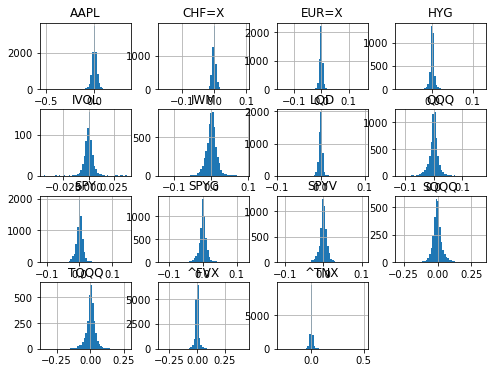

In [16]:
daily_pc.hist(bins=50, figsize=(8,6));

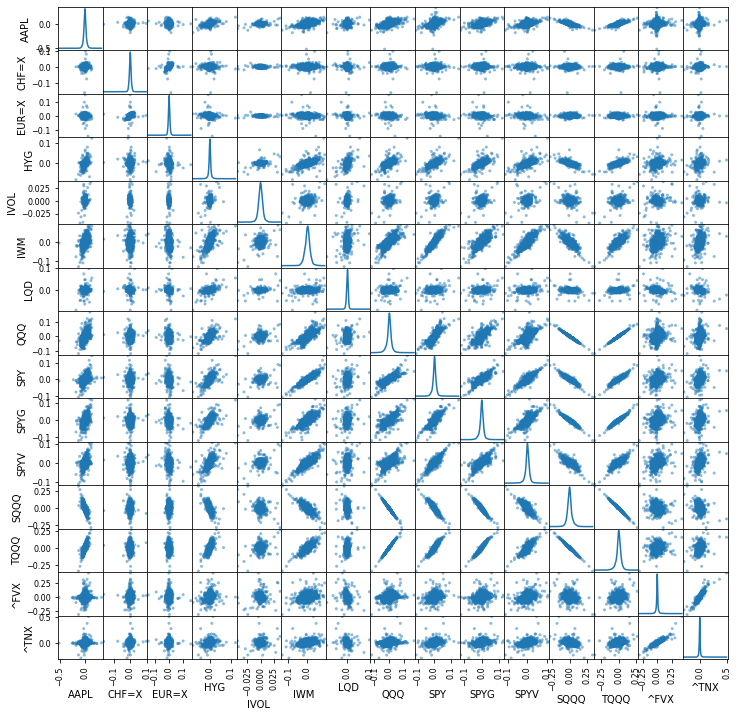

In [17]:


from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));



In [18]:


# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs



ticker,AAPL,CHF=X,EUR=X,HYG,IVOL,IWM,LQD,QQQ,SPY,SPYG,SPYV,SQQQ,TQQQ,^FVX,^TNX
ticker,,,,,,,,,,,,,,,
AAPL,1.000000,0.024817,-0.053577,0.411514,0.266856,0.499832,0.074077,0.630293,0.464444,0.551145,0.448044,-0.768724,0.768731,0.085754,0.090544
CHF=X,0.024817,1.000000,0.559600,-0.045775,-0.022789,0.011050,-0.067023,0.012490,-0.008950,-0.010323,-0.008393,-0.000114,-0.002507,0.052712,0.056317
EUR=X,-0.053577,0.559600,1.000000,-0.105975,-0.035157,-0.112141,-0.079599,-0.095005,-0.143433,-0.126242,-0.149213,0.029912,-0.032762,-0.004013,0.000889
HYG,0.411514,-0.045775,-0.105975,1.000000,0.313908,0.599564,0.416183,0.577351,0.662841,0.624397,0.625162,-0.659228,0.660952,0.192937,0.207684
IVOL,0.266856,-0.022789,-0.035157,0.313908,1.000000,0.284294,0.304521,0.291625,0.339273,0.316468,0.332158,-0.299194,0.298675,0.131233,0.161210
IWM,0.499832,0.011050,-0.112141,0.599564,0.284294,1.000000,0.074818,0.780817,0.890119,0.778508,0.823785,-0.801845,0.803386,0.315604,0.330605
LQD,0.074077,-0.067023,-0.079599,0.416183,0.304521,0.074818,1.000000,0.076577,0.115975,0.099515,0.082568,-0.112257,0.114280,-0.395451,-0.428546
QQQ,0.630293,0.012490,-0.095005,0.577351,0.291625,0.780817,0.076577,1.000000,0.836339,0.814867,0.657226,-0.997959,0.998197,0.223389,0.235719
SPY,0.464444,-0.008950,-0.143433,0.662841,0.339273,0.890119,0.115975,0.836339,1.000000,0.865348,0.887676,-0.921082,0.921473,0.272738,0.276618


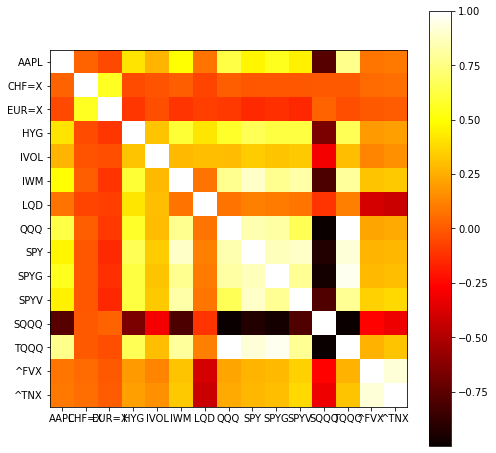

In [24]:


# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)



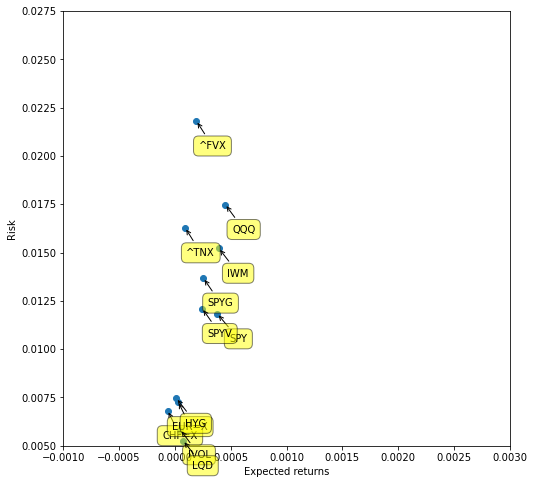

In [25]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)

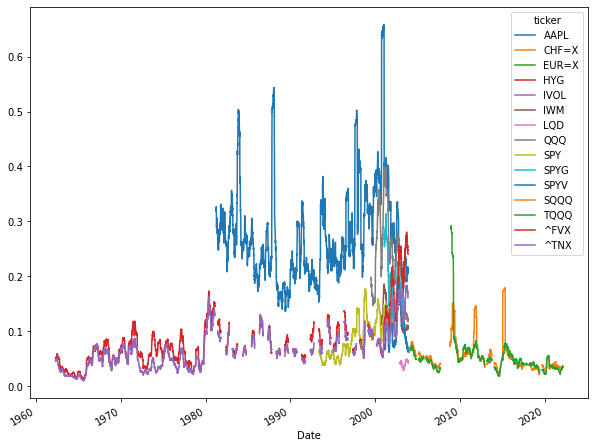

In [29]:


# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

